## Critical Points in multivariable functions

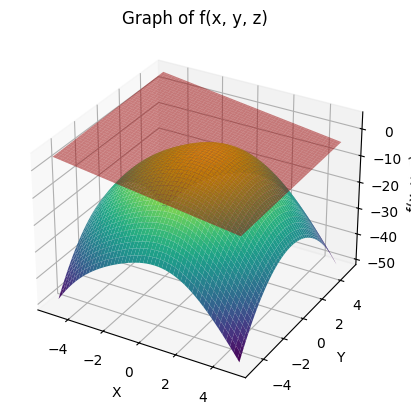

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y, z):
    return np.sin(z + x) - x**2 - y**2

# Generate x, y, z values
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)
z_values = np.linspace(-5, 5, 100)

# Create a meshgrid of x, y, z values
X, Y, Z = np.meshgrid(x_values, y_values, z_values)

# Compute the values of the function
F = f(X, Y, Z)

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Choose a specific slice of Z (for example, Z[:,:,50])
ax.plot_surface(X[:,:,50], Y[:,:,50], F[:,:,50], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y, z)')
ax.set_title('Graph of f(x, y, z)')


# Choose a critical point (for example, at index (50, 50, 50) in the grid)
critical_point = (X[50, 50, 50], Y[50, 50, 50], Z[50, 50, 50])

# Compute the gradient at the critical point
gradient_at_critical_point = np.array([
    np.cos(critical_point[2] + critical_point[0]) - 2 * critical_point[0],
    -2 * critical_point[1],
    np.cos(critical_point[2] + critical_point[0])
])

# Define the coefficients of the tangent plane equation (ax + by + cz + d = 0)
a, b, c = gradient_at_critical_point
d = - (a * critical_point[0] + b * critical_point[1] + c * critical_point[2])

# Generate points for the tangent plane
x_plane, y_plane = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
z_plane = (-a * x_plane - b * y_plane - d) / c

# Plot the tangent plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color='red')

plt.show()


## Computing the critical points (Maxima, Minima)

'Critical Points:'

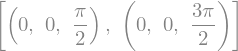

In [10]:
from sympy import symbols, sin, cos, solve, diff
sp.init_printing()

# Define the variables
x, y, z = symbols('x y z')

# Define the function
f = sin(z + x) - x**2 - y**2

# Compute the partial derivatives
df_dx = f.diff(x)
df_dy = f.diff(y)
df_dz = f.diff(z)

# Find the critical points
critical_points = solve((df_dx, df_dy, df_dz), (x, y, z))

# Print the critical points
display("Critical Points:", critical_points)


## Analysing critical points

$(H_{x, y} > 0)$ → maxima/minima <br>
$(H_{x, y} < 0)$ → saddle point



'Critical Points:'

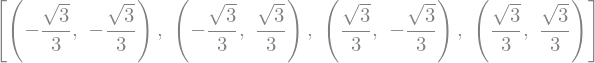

'Hessian Determinant at (-sqrt(3)/3, -sqrt(3)/3): 12'

'Hessian Determinant at (-sqrt(3)/3, sqrt(3)/3): -12'

'Hessian Determinant at (sqrt(3)/3, -sqrt(3)/3): -12'

'Hessian Determinant at (sqrt(3)/3, sqrt(3)/3): 12'

In [11]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**3+y**3-x-y
dx = sp.diff(f, x)
dy = sp.diff(f, y)
dxx = sp.diff(dx, x)
dyy = sp.diff(dy, y)
dxdy = sp.diff(dx, y)
crit = sp.solve((dx, dy), (x, y))
h_det = dxx * dyy - dxdy ** 2

# Print critical points
display("Critical Points:", crit)

# Evaluate the determinant of the Hessian matrix at each critical point
for point in crit:
    h_det_value = h_det.subs({x: point[0], y: point[1]})
    display("Hessian Determinant at {}: {}".format(point, h_det_value))




## Matrix multiplication

$$C_{mn}=\sum \limits _{k=1} ^{n}A_{mj}B_{jn}$$

Matrix A:


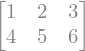


Matrix B:


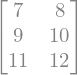


Result of matrix multiplication (C = A * B):


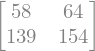

In [12]:
import sympy as sp

# Define symbolic matrices A and B
A = sp.Matrix([[1, 2, 3], [4, 5, 6]])
B = sp.Matrix([[7, 8], [9, 10], [11, 12]])

# Perform symbolic matrix multiplication
C = A * B

# Display the result
print("Matrix A:")
display(A)
print("\nMatrix B:")
display(B)
print("\nResult of matrix multiplication (C = A * B):")
display(C)

In [13]:
import numpy as np

# Define matrices A and B
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])

# Perform matrix multiplication
C = np.dot(A, B)

# Alternatively, you can use the @ operator for matrix multiplication
# C = A @ B

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nResult of matrix multiplication (C = A @ B):")
print(C)

Matrix A:
[[1 2 3]
 [4 5 6]]

Matrix B:
[[ 7  8]
 [ 9 10]
 [11 12]]

Result of matrix multiplication (C = A @ B):
[[ 58  64]
 [139 154]]


## Gradient Descent Algorithm

## Optimization with least squares

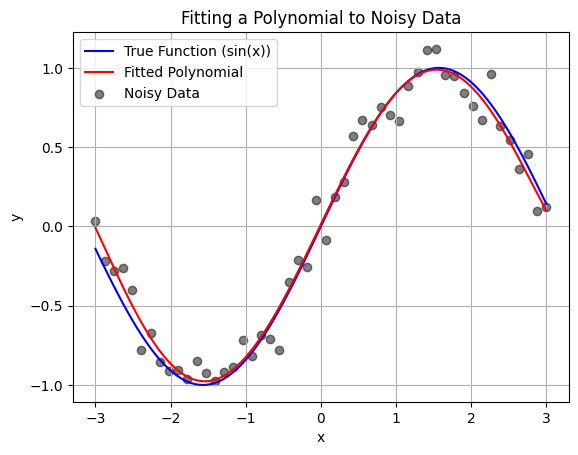

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the true function (sine function)
def true_function(x):
    return np.sin(x)

# Define the polynomial function to approximate the sine function
def polynomial_function(x, *coefficients):
    result = sum(coefficients[i] * x**i for i in range(len(coefficients)))
    return result

# Generate some noisy data points from the true function
np.random.seed(0)
x_data = np.linspace(-3, 3, 50)
y_data = true_function(x_data) + np.random.normal(0, 0.1, len(x_data))  # Adding some Gaussian noise

# Fit the polynomial function to the noisy data using curve_fit
initial_guess = np.zeros(6)  # Initial guess for the coefficients
optimal_coefficients, _ = curve_fit(polynomial_function, x_data, y_data, p0=initial_guess)

# Plot the original sine function and the fitted polynomial
x_values = np.linspace(-3, 3, 100)
plt.plot(x_values, true_function(x_values), label='True Function (sin(x))', color='blue')
plt.plot(x_values, polynomial_function(x_values, *optimal_coefficients), label='Fitted Polynomial', color='red')
plt.scatter(x_data, y_data, label='Noisy Data', color='black', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Polynomial to Noisy Data')
plt.legend()
plt.grid(True)
plt.show()


## Line integrals

$$
\int_C^{}f(x, y)ds = \int_a^{b}f(h(t), g(t)) \sqrt{\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)^{2}}dt
$$

In [7]:
import sympy as sp
import numpy as np

x, y, t = sp.symbols('x y t')

# Define the multivariable function
f = (2*y, 3*x)

# Define the parameterization of the curve
alpha = (sp.cos(t), sp.sin(t))

# Compute f(alpha(t))
f_alpha = [f_i.subs({x: alpha[0], y: alpha[1]}) for f_i in f]

# Compute the derivative of alpha with respect to t
alpha_prime = [sp.diff(alpha_i, t) for alpha_i in alpha]

# Compute the dot product of f(alpha(t)) and alpha'(t)
product = sum(fi * ai_prime for fi, ai_prime in zip(f_alpha, alpha_prime))

# Display the result
display(product)

int = sp.integrate(product, (t, -sp.pi, sp.pi)) 
display(int) 

-2*sin(t)**2 + 3*cos(t)**2

pi